In [56]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

Importing stocks and adding .NS to make it compatible with the Yfinance format

In [57]:
ticker= ['SBIN','ONGC','CIPLA','JIOFIN','RELIANCE','TCS','ASIANPAINT','INFIBEAM','COALINDIA','WIPRO','ADANIENT','LT','HDFCLIFE','LICI','TRIDENT','ITC','HDFCBANK','INFY','IDEA','BHARTIARTL','SUNPHARMA']
for i in range(0,len(ticker)):
    ticker[i] = ticker[i] + ".NS"


Creating the DataFrame and Dropping stocks which do not have values

In [58]:
stocks = yf.download(ticker,start="2010-01-01", end="2024-01-01")
stocks = stocks.dropna(axis=1, how='any')
stocks.head()


[*********************100%***********************]  21 of 21 completed


Price                       Adj Close                                          \
Ticker                    ADANIENT.NS ASIANPAINT.NS BHARTIARTL.NS    CIPLA.NS   
Date                                                                            
2010-01-04 00:00:00+00:00   57.215862    157.399872    272.333527  308.803314   
2010-01-05 00:00:00+00:00   58.539825    157.897110    276.646271  303.268555   
2010-01-06 00:00:00+00:00   64.317162    157.421875    273.715210  315.527344   
2010-01-07 00:00:00+00:00   61.662888    155.815887    275.850739  312.920074   
2010-01-08 00:00:00+00:00   62.442062    158.389862    272.207916  312.050995   

Price                                                                    \
Ticker                    HDFCBANK.NS    IDEA.NS     INFY.NS     ITC.NS   
Date                                                                      
2010-01-04 00:00:00+00:00  151.915115  34.550121  237.428284  59.265797   
2010-01-05 00:00:00+00:00  152.048676  35.767101  238.223404  59.849930   
2010-01-06 00:00:00+00:00  152.151123  36.390423  234.747253  59.990128   
2010-01-07 00:00:00+00:00  152.547424  36.242012  229.471802  59.803207   
2010-01-08 00:00:00+00:00  152.747879  35.945190  223.941895  59.931721   

Price                                              ...    Volume            \
Ticker                          LT.NS     ONGC.NS  ...   INFY.NS    ITC.NS   
Date                                               ...                       
2010-01-04 00:00:00+00:00  609.478577  105.796257  ...   4069264   5161635   
2010-01-05 00:00:00+00:00  610.559387  107.649460  ...   6895528  10767225   
2010-01-06 00:00:00+00:00  603.803101  109.008194  ...   6817288   7529979   
2010-01-07 00:00:00+00:00  600.902588  109.123970  ...  10892600   4987434   
2010-01-08 00:00:00+00:00  604.703918  108.313225  ...  12649312   4881351   

Price                                                              \
Ticker                       LT.NS  ONGC.NS RELIANCE.NS   SBIN.NS   
Date                                                                
2010-01-04 00:00:00+00:00  1060024  1905762    38323043  11031470   
2010-01-05 00:00:00+00:00  2683989  4657392    10696412  11613740   
2010-01-06 00:00:00+00:00  3076209  4203690    11845880  14527930   
2010-01-07 00:00:00+00:00  2033021  6394536    13098960   8576510   
2010-01-08 00:00:00+00:00  2940979  5678652     7555074  10453820   

Price                                                                
Ticker                    SUNPHARMA.NS   TCS.NS TRIDENT.NS WIPRO.NS  
Date                                                                 
2010-01-04 00:00:00+00:00       831170  1963682    7309990  3409626  
2010-01-05 00:00:00+00:00      1231990  2014488    5342380  4979701  
2010-01-06 00:00:00+00:00      1882490  3349176    3667230  4575030  
2010-01-07 00:00:00+00:00       923100  6474892   22172980  4582648  
2010-01-08 00:00:00+00:00      3298080  6048178   19074960  2856839  

[5 rows x 96 columns]

In [59]:
#creating a new dataframe which has values of closing price of columns
close = stocks.loc[:,"Close"].copy() 
close.head()

Ticker,ADANIENT.NS,ASIANPAINT.NS,BHARTIARTL.NS,CIPLA.NS,HDFCBANK.NS,IDEA.NS,INFY.NS,ITC.NS,LT.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TRIDENT.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,69.219017,178.865005,293.088867,337.549988,170.570007,35.092796,326.575012,84.550003,751.733337,197.908340,491.682404,229.119995,150.735001,375.825012,1.515,156.105011
2010-01-05 00:00:00+00:00,70.820740,179.429993,297.730347,331.500000,170.720001,36.328884,327.668762,85.383331,753.066650,201.375000,489.488007,229.205002,155.264999,375.924988,1.505,158.568756
2010-01-06 00:00:00+00:00,77.810081,178.889999,294.575928,344.899994,170.835007,36.962002,322.887512,85.583336,744.733337,203.916672,497.397003,230.580002,157.279999,367.424988,1.500,155.362503
2010-01-07 00:00:00+00:00,74.598969,177.065002,296.874146,342.049988,171.279999,36.811256,315.631256,85.316666,741.155579,204.133331,505.648834,229.289993,154.884995,357.200012,1.560,152.606262
2010-01-08 00:00:00+00:00,75.541611,179.990005,292.953674,341.100006,171.505005,36.509773,308.024994,85.500000,745.844421,202.616669,504.323059,228.604996,157.494995,349.899994,1.565,150.311264


Normalizing the data

In [60]:
normclose= close.div(close.iloc[0]).copy()
normclose.head()

Ticker,ADANIENT.NS,ASIANPAINT.NS,BHARTIARTL.NS,CIPLA.NS,HDFCBANK.NS,IDEA.NS,INFY.NS,ITC.NS,LT.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TRIDENT.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05 00:00:00+00:00,1.023140,1.003159,1.015836,0.982077,1.000879,1.035223,1.003349,1.009856,1.001774,1.017516,0.995537,1.000371,1.030053,1.000266,0.993399,1.015783
2010-01-06 00:00:00+00:00,1.124114,1.000140,1.005074,1.021775,1.001554,1.053265,0.988709,1.012222,0.990688,1.030359,1.011623,1.006372,1.043421,0.977649,0.990099,0.995244
2010-01-07 00:00:00+00:00,1.077724,0.989937,1.012915,1.013331,1.004162,1.048969,0.966489,1.009068,0.985929,1.031454,1.028405,1.000742,1.027532,0.950442,1.029703,0.977587
2010-01-08 00:00:00+00:00,1.091342,1.006290,0.999539,1.010517,1.005482,1.040378,0.943198,1.011236,0.992166,1.023790,1.025709,0.997752,1.044847,0.931018,1.033003,0.962886


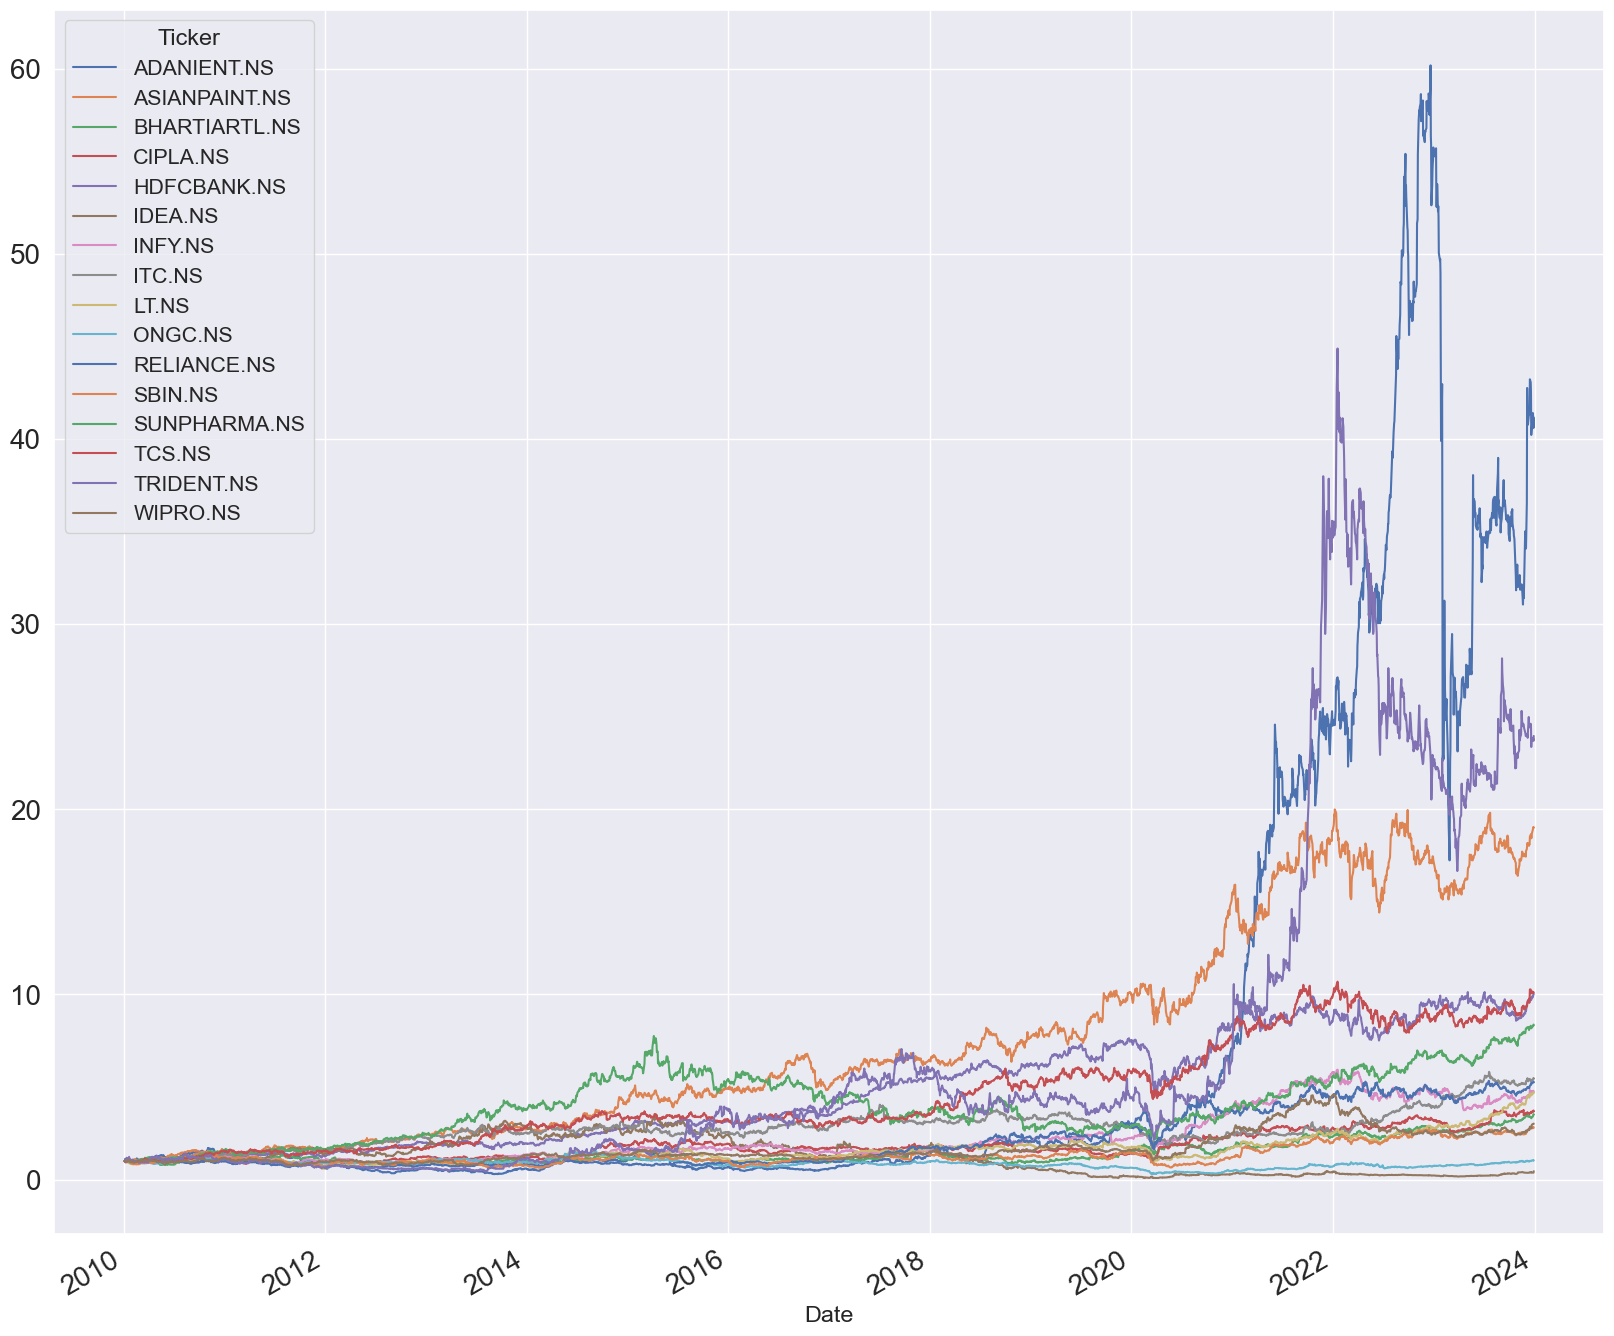

In [61]:
%matplotlib inline
normclose.plot(figsize=(20,18),fontsize=20)
plt.show()

In [62]:
#calculating the percentage change of the close series over period=1 unit
ret = close.pct_change(periods=1) 
ret.head()

Ticker,ADANIENT.NS,ASIANPAINT.NS,BHARTIARTL.NS,CIPLA.NS,HDFCBANK.NS,IDEA.NS,INFY.NS,ITC.NS,LT.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TRIDENT.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,0.023140,0.003159,0.015836,-0.017923,0.000879,0.035223,0.003349,0.009856,0.001774,0.017516,-0.004463,0.000371,0.030053,0.000266,-0.006601,0.015783
2010-01-06 00:00:00+00:00,0.098691,-0.003009,-0.010595,0.040422,0.000674,0.017427,-0.014592,0.002342,-0.011066,0.012622,0.016158,0.005999,0.012978,-0.022611,-0.003322,-0.020220
2010-01-07 00:00:00+00:00,-0.041269,-0.010202,0.007802,-0.008263,0.002605,-0.004078,-0.022473,-0.003116,-0.004804,0.001062,0.016590,-0.005595,-0.015228,-0.027829,0.040000,-0.017741
2010-01-08 00:00:00+00:00,0.012636,0.016519,-0.013206,-0.002777,0.001314,-0.008190,-0.024099,0.002149,0.006326,-0.007430,-0.002622,-0.002987,0.016851,-0.020437,0.003205,-0.015039


In [63]:
summary = ret.describe().T
summary["mean"] = summary["mean"]*262
summary["std"] = summary["std"]*np.sqrt(262)
summary.head()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
ADANIENT.NS,3453.0,0.427182,0.534390,-0.387493,-0.013025,0.000931,0.015861,0.273680
ASIANPAINT.NS,3453.0,0.257271,0.259602,-0.140279,-0.007777,0.000482,0.009473,0.088527
BHARTIARTL.NS,3453.0,0.145806,0.317845,-0.119529,-0.010560,-0.000220,0.010710,0.112908
CIPLA.NS,3453.0,0.133680,0.263610,-0.088256,-0.008413,-0.000477,0.008635,0.130375
HDFCBANK.NS,3453.0,0.203257,0.238146,-0.126069,-0.006990,0.000507,0.007996,0.115996


Plotting Risk vs Return of various stocks

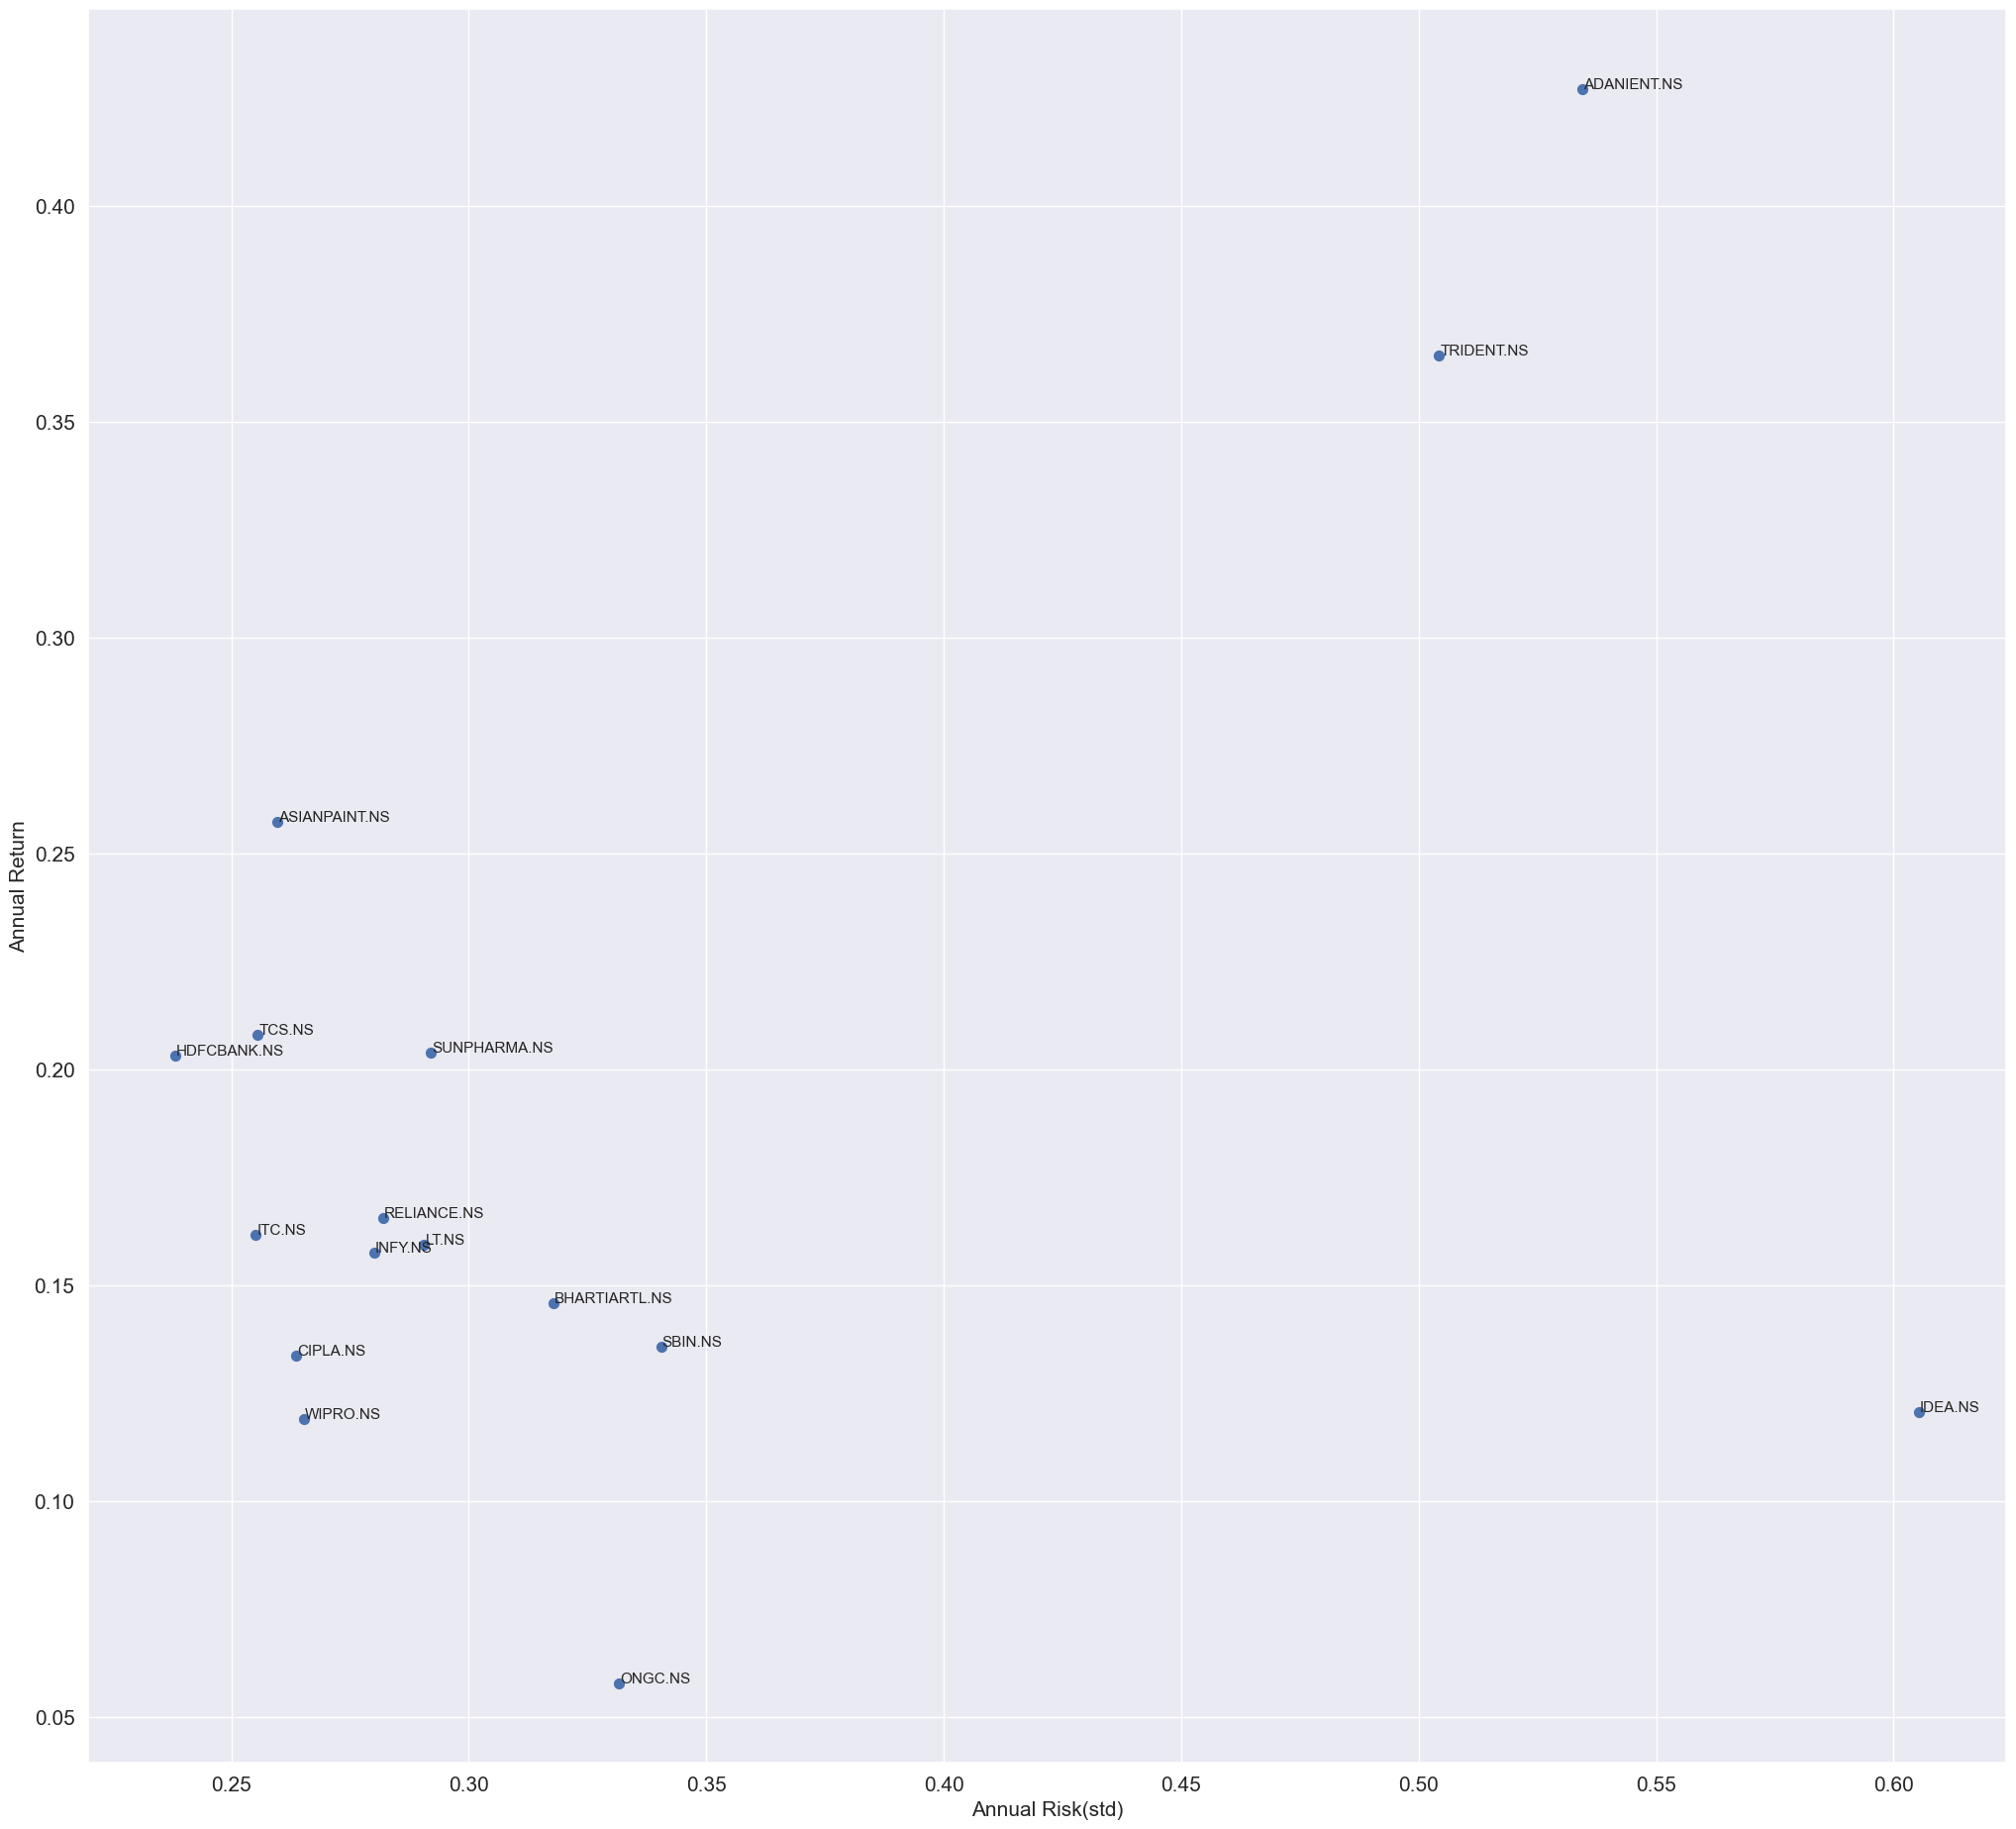

In [64]:
summary.plot.scatter(x="std",y="mean",figsize=(25,23),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy = (summary.loc[i,"std"]+0.0002,summary.loc[i,"mean"]+0.0002),size=11)
    
plt.xlabel("Annual Risk(std)",fontsize = 15)
plt.ylabel("Annual Return",fontsize = 15)
plt.show()

In [65]:
ret.cov()
ret.head()

Ticker,ADANIENT.NS,ASIANPAINT.NS,BHARTIARTL.NS,CIPLA.NS,HDFCBANK.NS,IDEA.NS,INFY.NS,ITC.NS,LT.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TRIDENT.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,0.023140,0.003159,0.015836,-0.017923,0.000879,0.035223,0.003349,0.009856,0.001774,0.017516,-0.004463,0.000371,0.030053,0.000266,-0.006601,0.015783
2010-01-06 00:00:00+00:00,0.098691,-0.003009,-0.010595,0.040422,0.000674,0.017427,-0.014592,0.002342,-0.011066,0.012622,0.016158,0.005999,0.012978,-0.022611,-0.003322,-0.020220
2010-01-07 00:00:00+00:00,-0.041269,-0.010202,0.007802,-0.008263,0.002605,-0.004078,-0.022473,-0.003116,-0.004804,0.001062,0.016590,-0.005595,-0.015228,-0.027829,0.040000,-0.017741
2010-01-08 00:00:00+00:00,0.012636,0.016519,-0.013206,-0.002777,0.001314,-0.008190,-0.024099,0.002149,0.006326,-0.007430,-0.002622,-0.002987,0.016851,-0.020437,0.003205,-0.015039


In [66]:
#Forming a co-relation matrix
ret.corr()

Ticker,ADANIENT.NS,ASIANPAINT.NS,BHARTIARTL.NS,CIPLA.NS,HDFCBANK.NS,IDEA.NS,INFY.NS,ITC.NS,LT.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TCS.NS,TRIDENT.NS,WIPRO.NS
Ticker,,,,,,,,,,,,,,,,
ADANIENT.NS,1.000000,0.208710,0.222835,0.168680,0.283016,0.137206,0.148048,0.177577,0.351235,0.263128,0.316825,0.366567,0.201836,0.146186,0.229360,0.160620
ASIANPAINT.NS,0.208710,1.000000,0.209627,0.171803,0.305503,0.110682,0.168891,0.201228,0.314665,0.158975,0.285429,0.243246,0.174525,0.178479,0.163831,0.179699
BHARTIARTL.NS,0.222835,0.209627,1.000000,0.178340,0.285022,0.377980,0.169675,0.217966,0.299133,0.231987,0.276749,0.285073,0.173284,0.153556,0.152296,0.150915
CIPLA.NS,0.168680,0.171803,0.178340,1.000000,0.179338,0.109583,0.157710,0.163119,0.233923,0.187319,0.186615,0.216124,0.376125,0.163640,0.151563,0.179108
HDFCBANK.NS,0.283016,0.305503,0.285022,0.179338,1.000000,0.155571,0.259544,0.302594,0.492956,0.256670,0.419414,0.449914,0.216819,0.252949,0.187023,0.235939
IDEA.NS,0.137206,0.110682,0.377980,0.109583,0.155571,1.000000,0.087404,0.134508,0.178599,0.108454,0.141410,0.198983,0.136630,0.065945,0.144900,0.100910
INFY.NS,0.148048,0.168891,0.169675,0.157710,0.259544,0.087404,1.000000,0.146126,0.237867,0.139013,0.241203,0.172428,0.169516,0.546335,0.139864,0.501027
ITC.NS,0.177577,0.201228,0.217966,0.163119,0.302594,0.134508,0.146126,1.000000,0.277815,0.238287,0.241047,0.280301,0.196294,0.191833,0.154335,0.181384
LT.NS,0.351235,0.314665,0.299133,0.233923,0.492956,0.178599,0.237867,0.277815,1.000000,0.339297,0.388942,0.519080,0.219882,0.207964,0.258332,0.221430


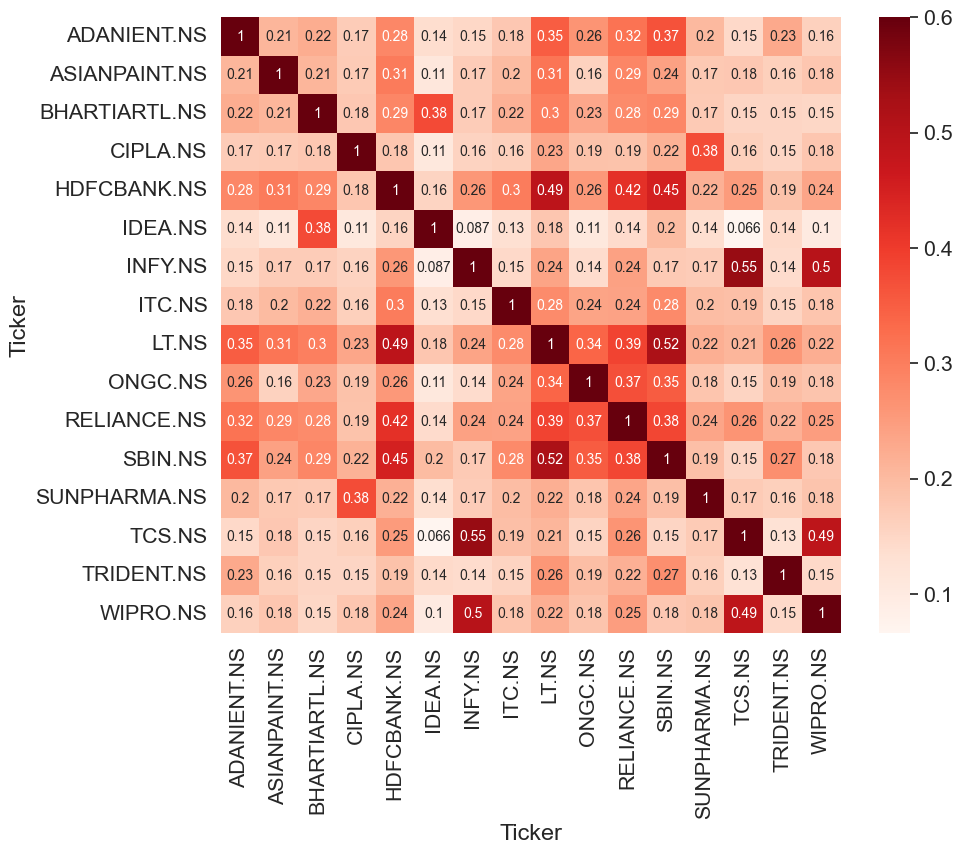

In [67]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":10},vmax=0.6)
plt.show()

Predictive model for RSI

[*********************100%***********************]  1 of 1 completed


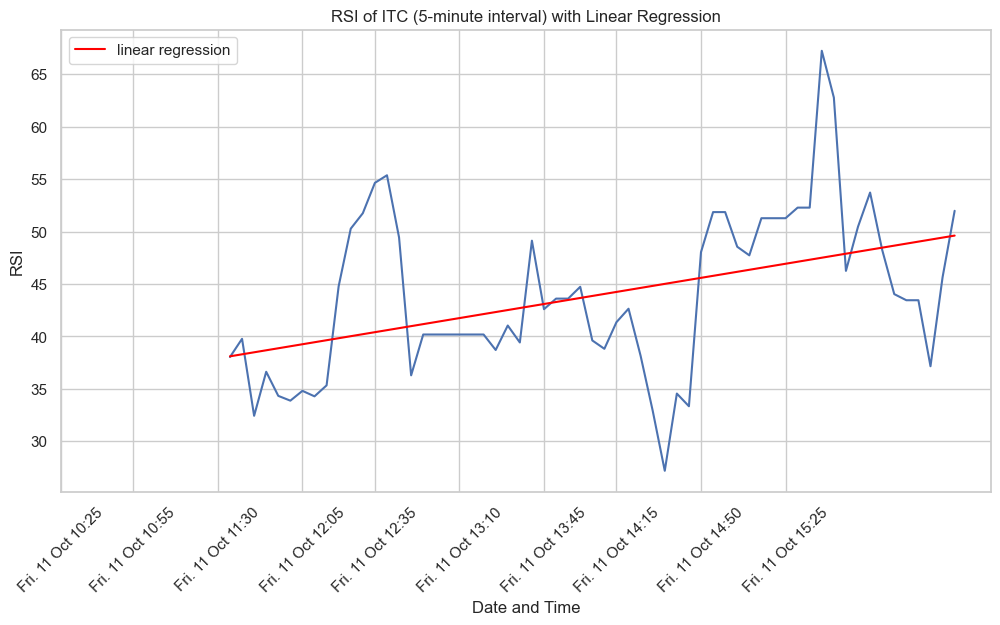

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Function to fetch historical data from Yahoo Finance
def fetch_historical_data(symbol, period="1d", interval="5m"):   #******Change your timeframe here****
    data = yf.download(tickers=symbol, period=period, interval=interval)
    return data

# Function to calculate the selected indicator
def calculate_indicator(data, indicator='RSI', length=14):
    if indicator == 'RSI':
        data[indicator] = ta.rsi(data['Close'], length=length)
    elif indicator == 'SMA':
        data[indicator] = ta.sma(data['Close'], length=length)
    return data[indicator]

# Function to plot the selected indicator
def plot_indicator(data, indicator, model='linear'):
    # Get the last 100 bars of the selected indicator
    history = data[indicator].tail(100).reset_index()
    history['index'] = history.index

    # Drop rows with NaN values
    history = history.dropna(subset=[indicator])

    # Remove timezone information from the 'Datetime' column if present
    if 'Datetime' not in history.columns:
        history['Datetime'] = data.index[-len(history):]
    
    # Convert Datetime to timezone-naive (removing timezone information)
    if history['Datetime'].dtype == 'datetime64[ns, Asia/Kolkata]':
        history['Datetime'] = history['Datetime'].dt.tz_localize(None)

    # Create the regression model and fit it to the data
    if model == 'linear':
        reg = LinearRegression()
    elif model == 'svr':
        reg = SVR(kernel='rbf', C=1e3, gamma=0.1)
        scaler = StandardScaler()
        history[indicator] = scaler.fit_transform(history[[indicator]])

    reg.fit(history[['index']], history[indicator])
    history[f'{model}_pred'] = reg.predict(history[['index']])

    # Plot the indicator and the regression line
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='index', y=indicator, data=history)
    sns.lineplot(x='index', y=f'{model}_pred', data=history, color='red', label=f'{model} regression')

    # Set the number of ticks and labels dynamically
    num_ticks = 10  # Set the number of ticks you want (e.g., 10 evenly spaced ticks)
    tick_positions = np.linspace(0, len(history) - 1, num_ticks, dtype=int)
    tick_labels = history['Datetime'].iloc[tick_positions].dt.strftime('%a. %d %b %H:%M')

    # Set the plot title, axes labels, and tick labels
    plt.title(f"{indicator} of ITC (5-minute interval) with {model.capitalize()} Regression")
    plt.xlabel("Date and Time")
    plt.ylabel(indicator)
    plt.xticks(tick_positions, tick_labels, rotation=45)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Set the symbol and indicator to be plotted
    symbol = "ITC.NS"  #*******Change your Stock here*********
    indicator = 'RSI'

    # Fetch the historical data and calculate the selected indicator
    data = fetch_historical_data(symbol)
    indicator_data = calculate_indicator(data, indicator=indicator)

    # Plot the indicator with support vector regression
    plot_indicator(data, indicator, 'linear')

Predictive model for SMA

[*********************100%***********************]  1 of 1 completed


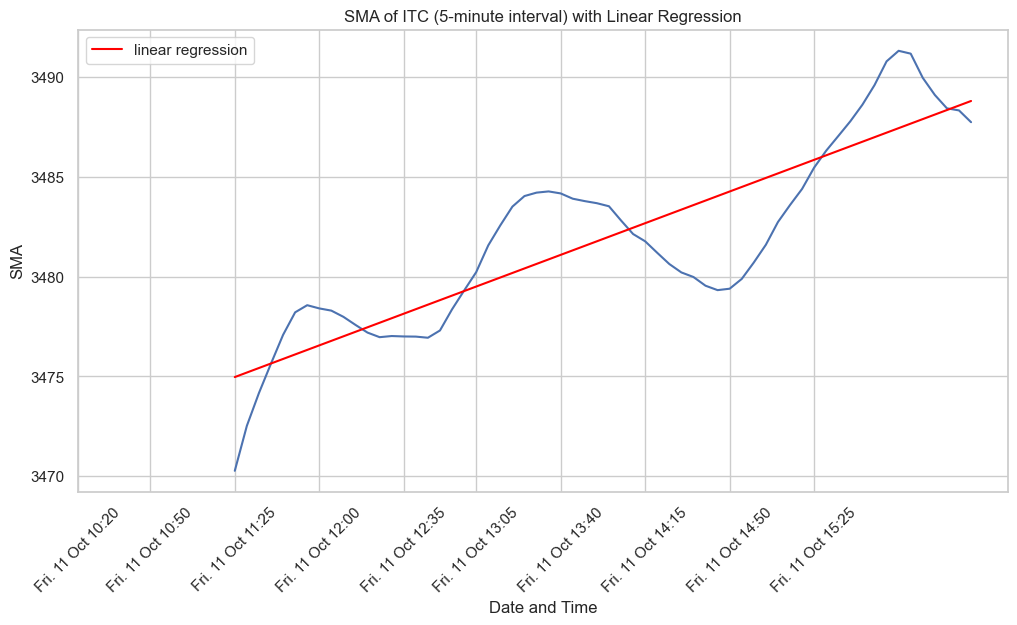

In [69]:
if __name__ == "__main__":
    # Set the symbol and indicator to be plotted
    symbol = "LT.NS"  #*******Change your Stock here*********
    indicator = 'SMA'

    # Fetch the historical data and calculate the selected indicator
    data = fetch_historical_data(symbol)
    indicator_data = calculate_indicator(data, indicator=indicator)

    # Plot the indicator with support vector regression
    plot_indicator(data, indicator, 'linear')